**IMPORTING LIBRARIES**

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

**LOADING DATASET**

In [2]:
games = pd.read_csv('/datasets/games.csv')

**INITIAL REVIEW OF DATASET**

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**column names:**
- All column names are wrong because all start/contains capital letters.

**missing values:**

- name
- year_of release
- genre
- critic_Score
- user_score
- rating

**wrong data type:**
- Year_of_Release: should be integer
- User_Score: should be float

**PRE-EXPLORATORY ANALYSIS**

**changing column names**

In [6]:
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**missing values**

In [7]:
# due the quantity of missing vales in columns: name and genre are not a representative value, we decide to drop them.

games = games.dropna(subset=['name', 'genre']).reset_index(drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***year_of_release missing values***

In [8]:
yor_mean = games.groupby('name')['year_of_release'].median()
yor_mean

name
 Beyblade Burst                 2016.0
 Fire Emblem Fates              2015.0
 Frozen: Olaf's Quest           2013.0
 Haikyu!! Cross Team Match!     2016.0
 Tales of Xillia 2              2012.0
                                 ...  
thinkSMART: Chess for Kids      2011.0
uDraw Studio                    2010.0
uDraw Studio: Instant Artist    2011.0
wwe Smackdown vs. Raw 2006         NaN
¡Shin Chan Flipa en colores!    2007.0
Name: year_of_release, Length: 11559, dtype: float64

In [9]:
def yor_missing(row):

    name = row['name']
    
    if pd.isna(row['year_of_release']):
        return yor_mean[name]
    else:
        return row['year_of_release']

In [10]:
games['year_of_release'] = games.apply(yor_missing, axis=1)
games['year_of_release'].isna().sum()

146

In [11]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

#changing type of data
games['year_of_release'] = games['year_of_release'].astype('int64')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


***critic_score missing values***

In [12]:
cs_median = games.groupby('genre')['critic_score'].median()
cs_median

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64

In [13]:
def cs_missing(row):
    
    genre = row['genre']
    
    if pd.isna(row['critic_score']):
        return cs_median[genre]
    else:
        return row['critic_score']

In [14]:
games['critic_score'] = games.apply(cs_missing, axis=1)
games['critic_score'].isna().sum()

0

***user_score missing values***

In [15]:
games['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1         2
0.6       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [16]:
#replaces every 'tbd' value in the user_score column to NaN i.e a missing value

games['user_score'] = games['user_score'].replace({'tbd': np.nan})

In [17]:
#change data type for user_score column

games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [18]:
user_score_median = games.groupby('genre')['user_score'].median()
user_score_median

genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64

In [19]:
def user_score_missing(row):
    
    genre = row['genre']
    
    if pd.isna(row['user_score']):
        return user_score_median[genre]
    else:
        return row['user_score']

In [20]:
games['user_score'] = games.apply(user_score_missing, axis=1)
games['user_score'].isna().sum()

0

***rating missing values***

In [21]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
rating_median = games.groupby('genre')['rating'].agg(pd.Series.mode)
rating_median

genre
Action          T
Adventure       E
Fighting        T
Misc            E
Platform        E
Puzzle          E
Racing          E
Role-Playing    T
Shooter         M
Simulation      E
Sports          E
Strategy        T
Name: rating, dtype: object

In [23]:
def rating_missing(row):
    
    genre= row['genre']
    
    if pd.isna(row['rating']):
        return rating_median[genre]
    else:
        return row['rating']

In [24]:
games['rating'] = games.apply(rating_missing, axis=1)
games['rating'].isna().sum()

0

**total sales**

In [25]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


**DATA ANALYSIS**

**games launched in each year**

In [26]:
total_games_per_year = games.groupby('year_of_release')['name'].count()
total_games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     340
2000     351
2001     486
2002     844
2003     784
2004     765
2005     948
2006    1019
2007    1202
2008    1441
2009    1430
2010    1269
2011    1153
2012     662
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

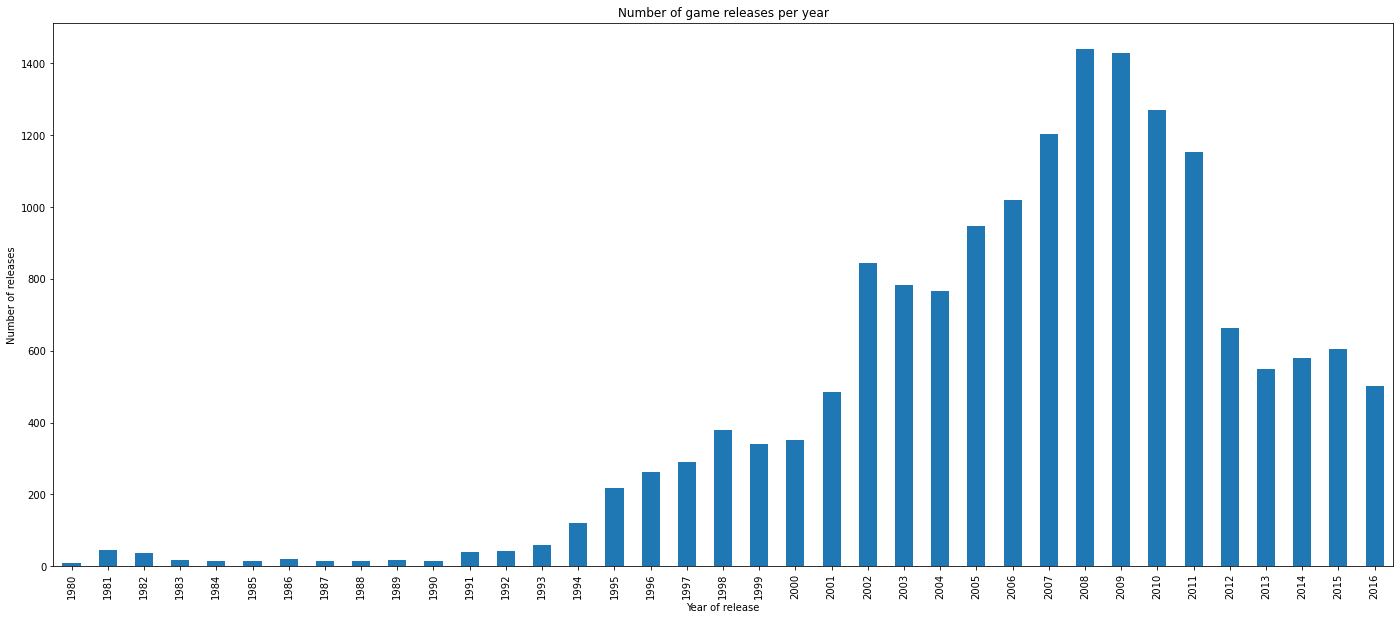

In [27]:
total_games_per_year.plot(kind='bar', rot=90, figsize=(24, 10))
plt.title('Number of game releases per year')
plt.xlabel('Year of release')
plt.ylabel('Number of releases')
plt.show()

**top 5 lifetime platforms**

In [28]:
platform_ranking = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_ranking

top_5_platforms = platform_ranking.head()
top_5_platforms

platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
Name: total_sales, dtype: float64

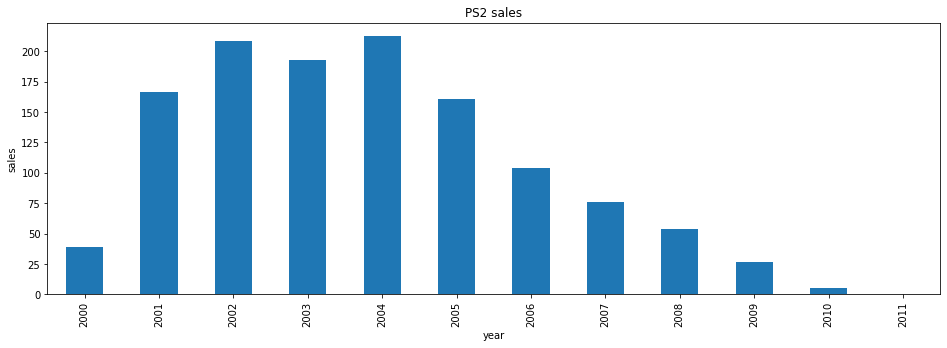

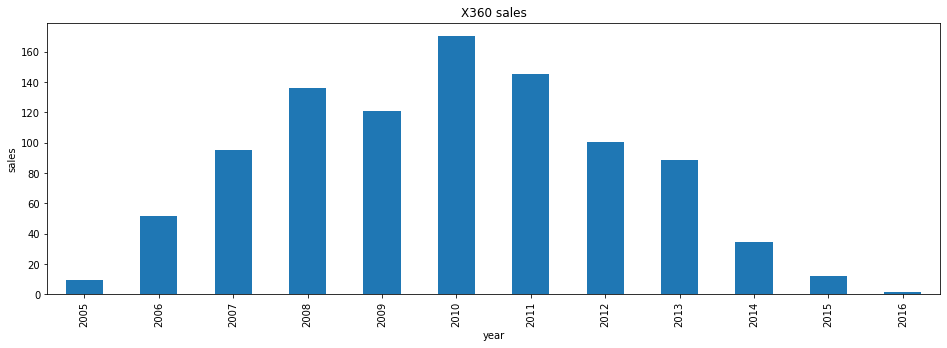

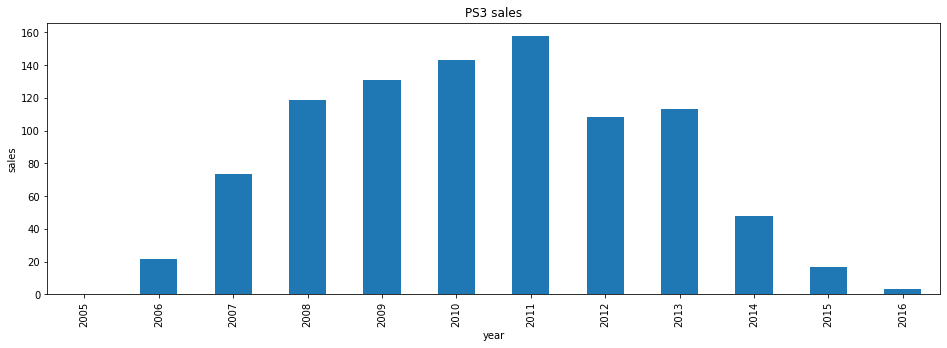

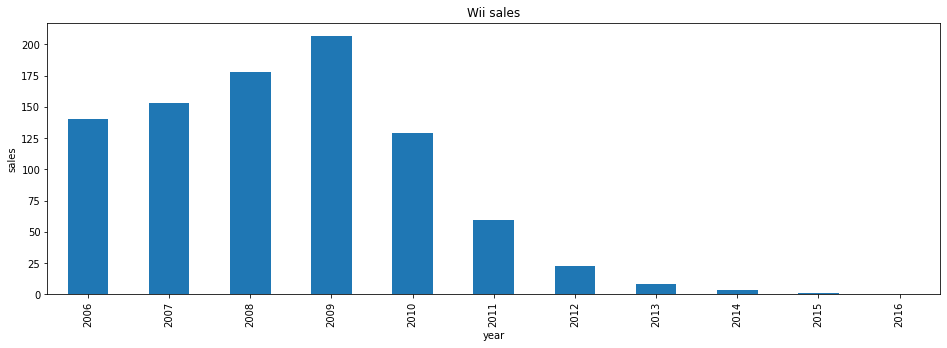

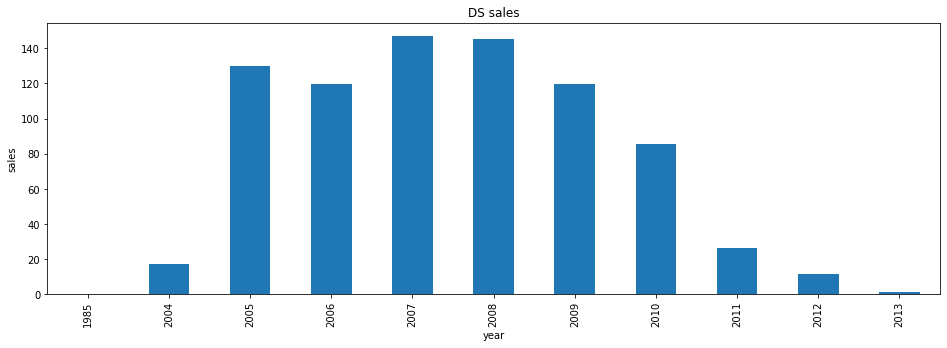

In [29]:
for plat in top_5_platforms.index:

    df_platform = games.query('platform == @plat')
    df_platform.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(16, 5))
    
    plt.title('{} sales'.format(plat))
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()
    print('')

**platform's sales since 2014**

We only take into account the last three years of data because they are the most recent and to avoid "noise" in dataset

In [30]:
recent_platform_ranking = games.query('year_of_release >= 2014')
recent_platform = recent_platform_ranking.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
recent_platform

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

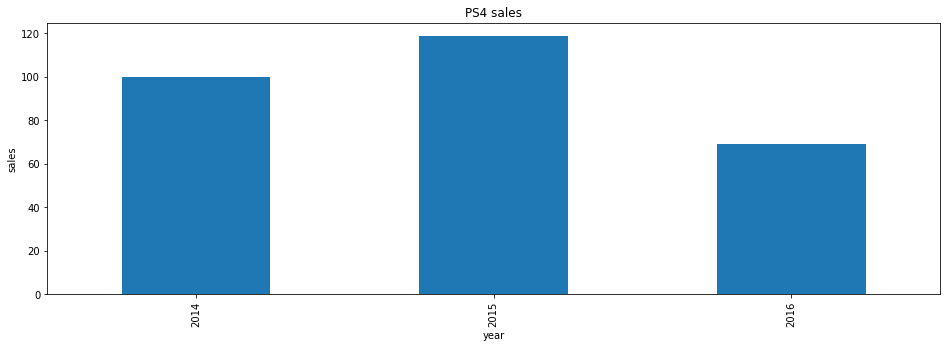

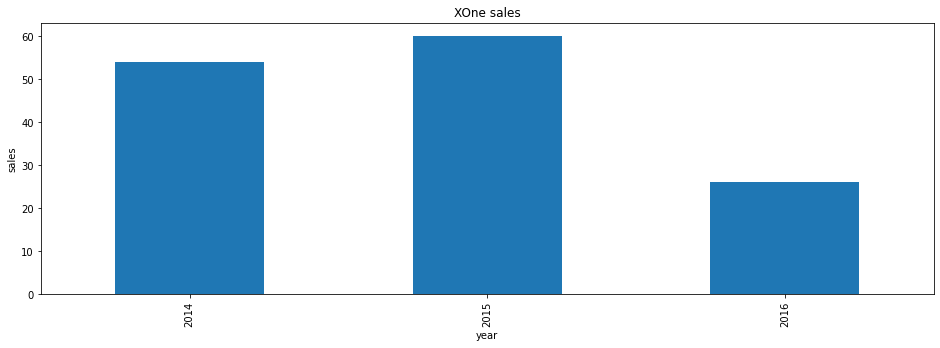

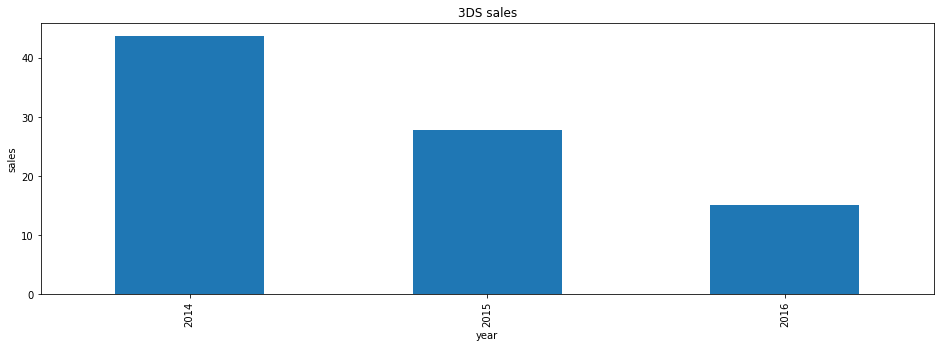

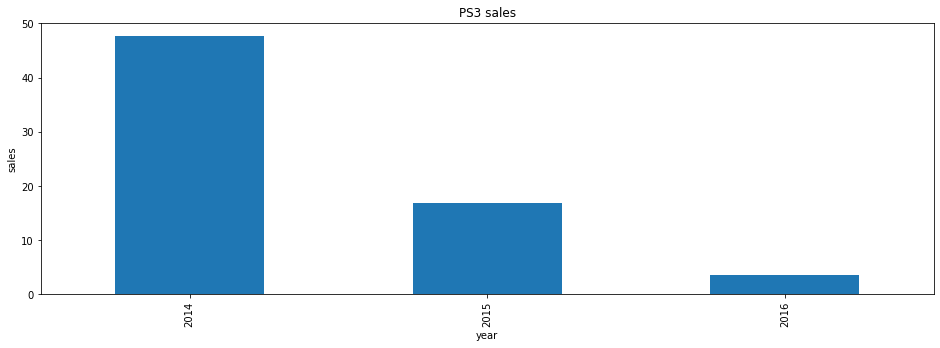

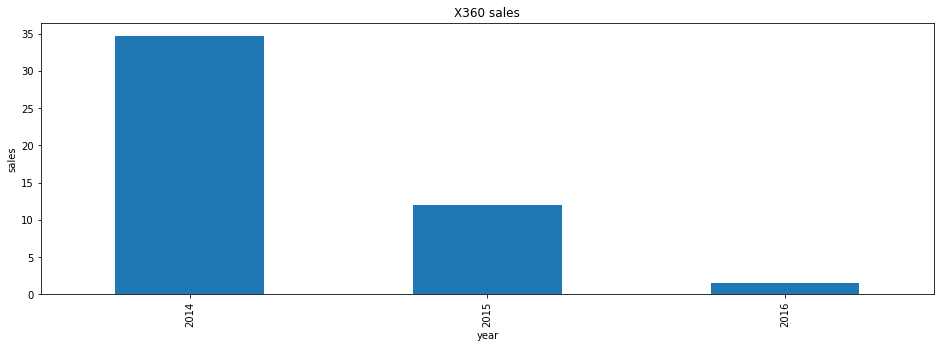

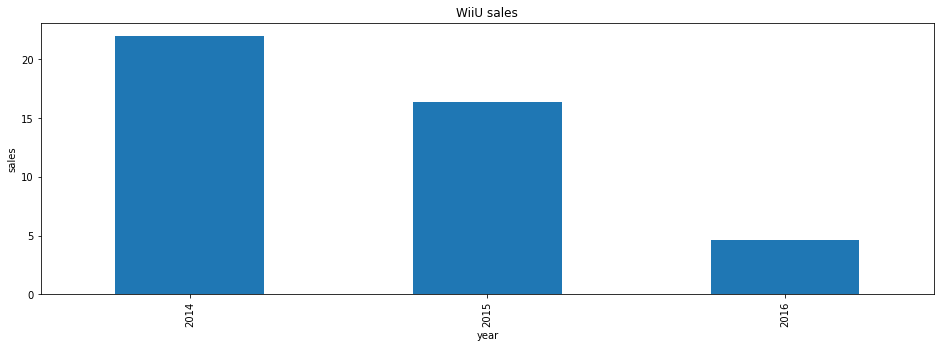

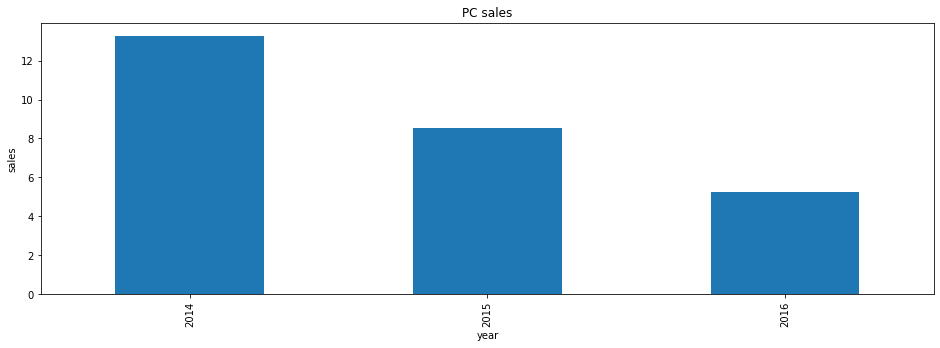

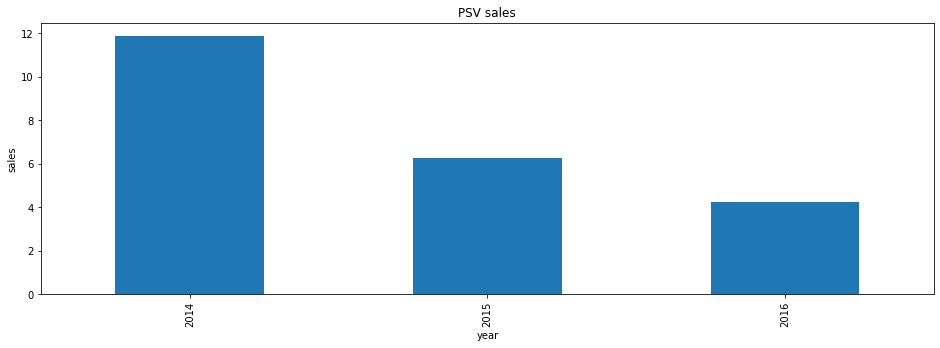

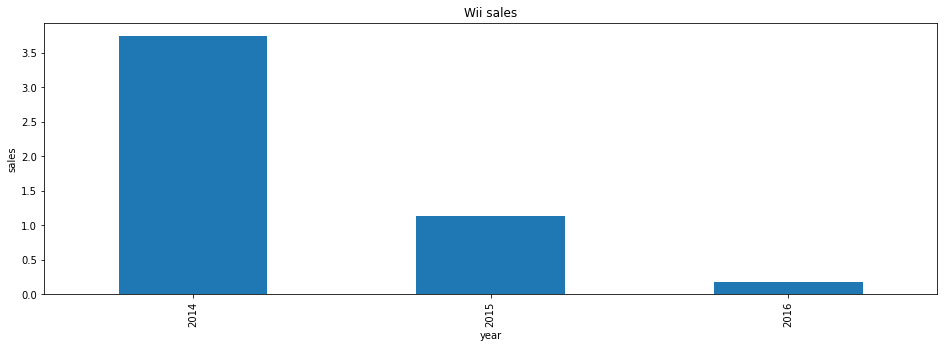

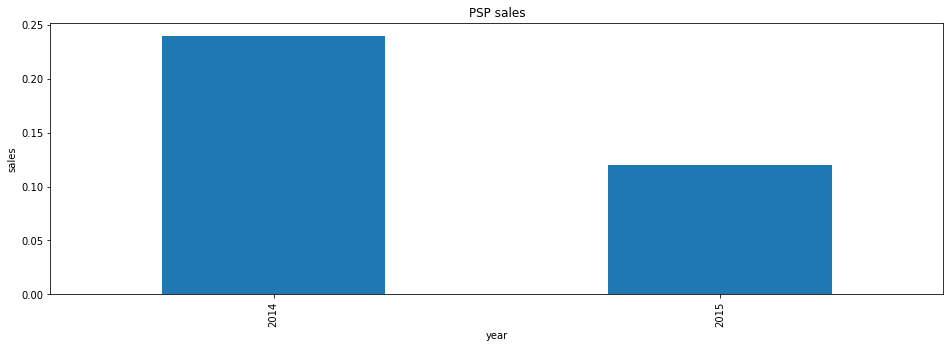

In [31]:
for plat in recent_platform.index:
    
    df_platform = recent_platform_ranking.query('platform == @plat')
    df_platform.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(16, 5))
    
    plt.title('{} sales'.format(plat))
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()
    print('')

**genres of video games more profitable and with more releases**

In [32]:
# more profitable genres

profit_genres = recent_platform_ranking.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
profit_genres

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

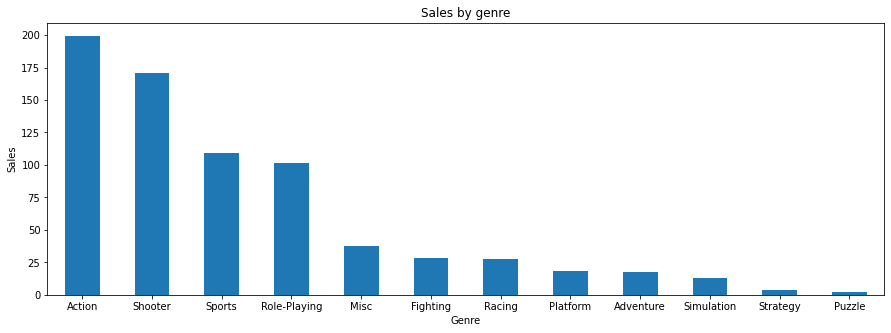

In [33]:
profit_genres.plot.bar(rot=0, figsize=(15, 5))
plt.title('Sales by genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

In [34]:
# genres with more relesases

release_genres = recent_platform_ranking.groupby('genre')['year_of_release'].count().sort_values()
release_genres

genre
Puzzle           14
Strategy         37
Platform         38
Simulation       44
Fighting         60
Racing           69
Misc            113
Shooter         128
Sports          161
Adventure       185
Role-Playing    221
Action          619
Name: year_of_release, dtype: int64

**which platforms, genre and rating are the most used in each region**

***North América***

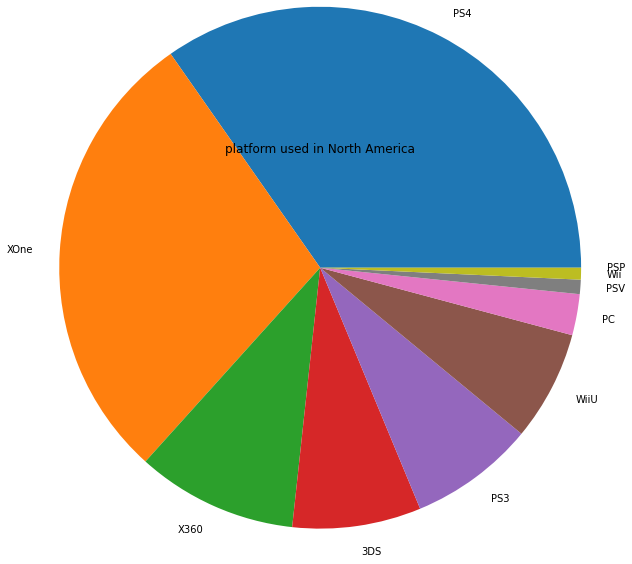

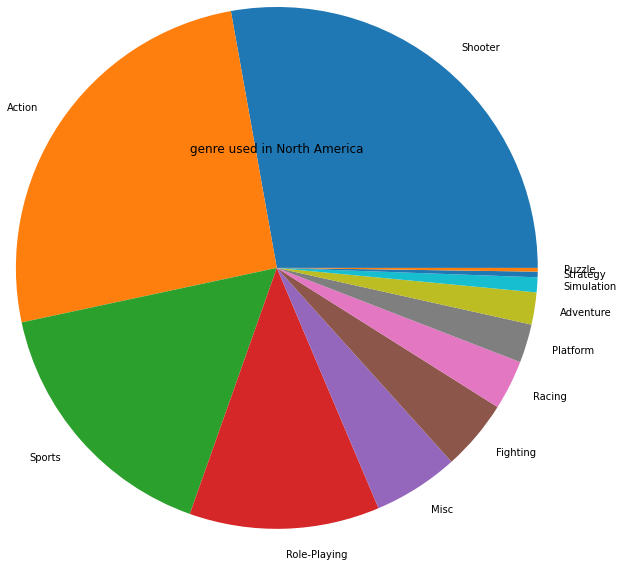

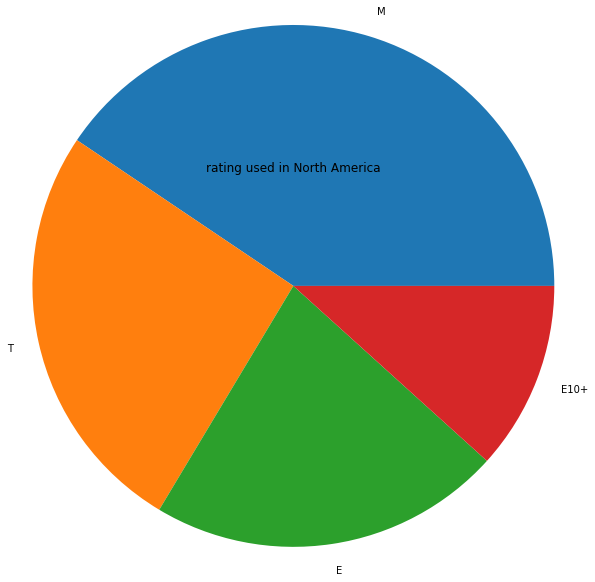

In [35]:
cols = ['platform', 'genre', 'rating']

for col in cols:
    na_data = recent_platform_ranking.groupby(col)['na_sales'].sum().sort_values(ascending=False)
    plt.pie(na_data, labels=na_data.index, radius=3)
    plt.title('{} used in North America'.format(col))
    plt.show()
    print('')

***Europe***

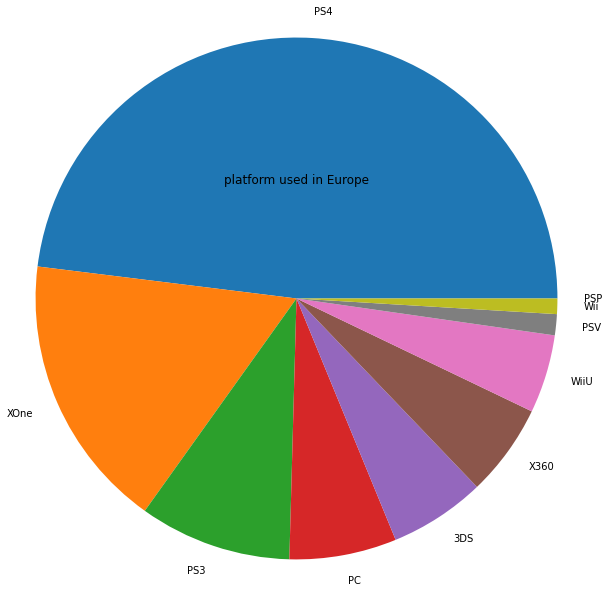

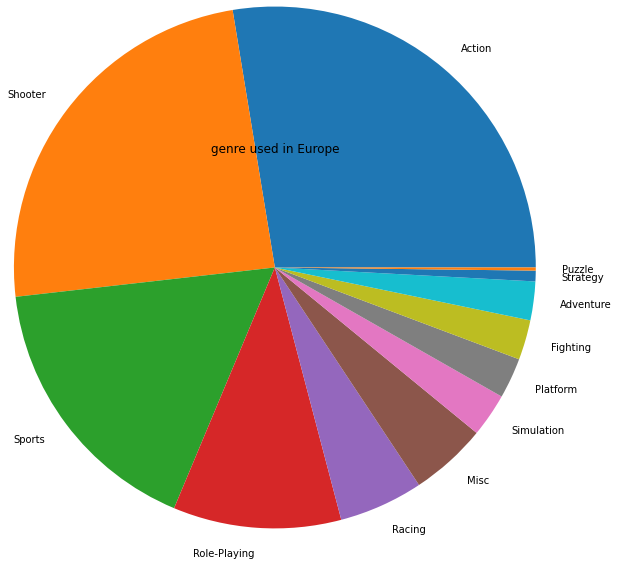

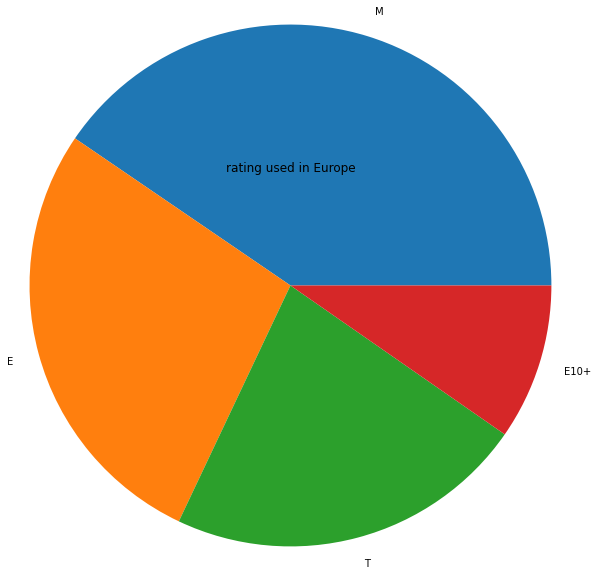

In [36]:
cols = ['platform', 'genre', 'rating']

for col in cols:
    eu_data = recent_platform_ranking.groupby(col)['eu_sales'].sum().sort_values(ascending=False)
    plt.pie(eu_data, labels=eu_data.index, radius=3)
    plt.title('{} used in Europe'.format(col))
    plt.show()
    print('')

***Japan***

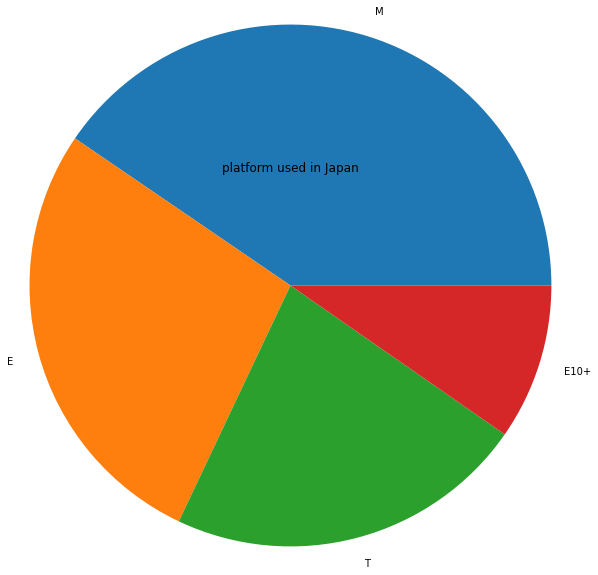

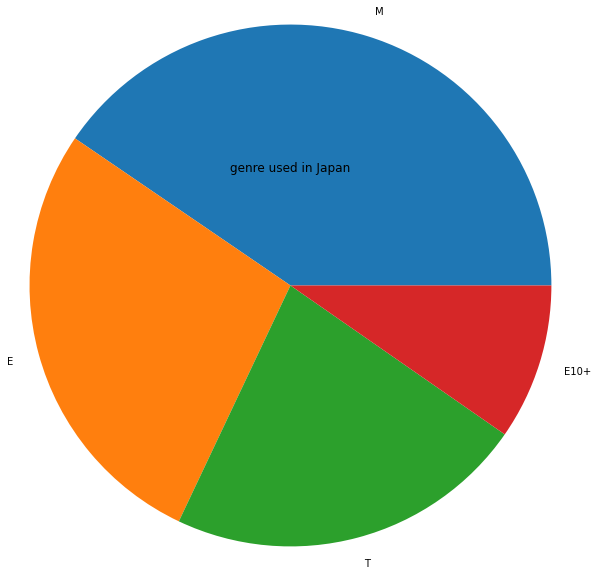

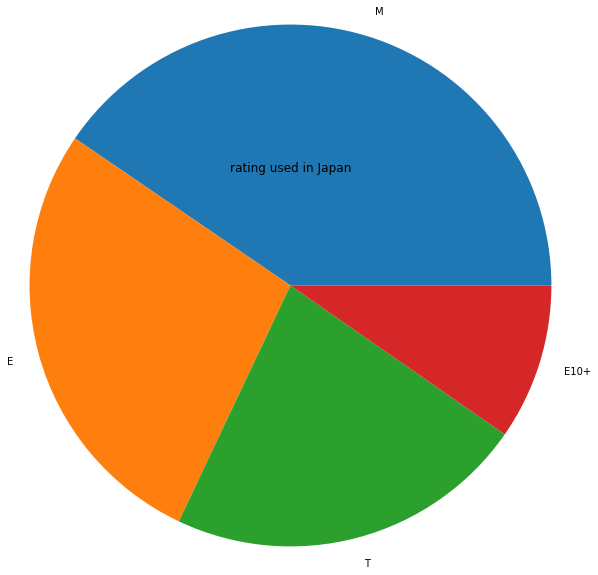

In [37]:
cols = ['platform', 'genre', 'rating']

for col in cols:
    jp_data = recent_platform_ranking.groupby(col)['jp_sales'].sum().sort_values(ascending=False)
    plt.pie(eu_data, labels=eu_data.index, radius=3)
    plt.title('{} used in Japan'.format(col))
    plt.show()
    print('')

**HYPOTHESIS TETS**

**Null hypothesis: XBox and PC's average user socore are the same**

**Alternative hypothesis: XBox and PC's average user socore are different**

In [38]:
# creating dataset for hypothesis tests

xone_data = recent_platform_ranking.query('platform == "XOne"')
pc_data = recent_platform_ranking.query('platform == "PC"')

In [39]:
alpha = 0.05 
result = st.levene(xone_data['user_score'], pc_data['user_score'], center='mean')
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('The variances are approximately the same')
else:
    print('The variances are too far apart to be considered homogeneous')

p-value: 9.281025811889034e-05
The variances are too far apart to be considered homogeneous


In [40]:
alpha = 0.05
result = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], equal_var=False)
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('We cannot reject the null hypothesis')
else:
    print('We reject the null hypothesis')

p-value: 0.05074473945849195
We cannot reject the null hypothesis


P-value is higher than alpha so, we cannot reject the null hypothesis

**Null hypothesis: Action and Sports's average user socore are the same**

**Alternative hypothesis:  Action and Sports's average user socore are different**

In [41]:
# creating dataset for hypothesis tests

action_data = recent_platform_ranking.query('genre == "Action"')
sport_data = recent_platform_ranking.query('genre == "Sports"')

In [42]:
alpha = 0.05 
result = st.levene(action_data['user_score'], sport_data['user_score'], center='mean')
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('The variances are approximately the same')
else:
    print('The variances are too far apart to be considered homogeneous')

p-value: 8.75974177762667e-33
The variances are too far apart to be considered homogeneous


In [43]:
alpha = 0.05
result = st.ttest_ind(action_data['user_score'], sport_data['user_score'], equal_var=False)
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('We cannot reject the null hypothesis')
else:
    print('We reject the null hypothesis')

p-value: 7.412639945317349e-17
We reject the null hypothesis


P-value is lower than alpha so, we reject the null hypothesis